<a href="https://colab.research.google.com/github/LuizhbTavares/NinjaStartupJob-TheLookeCommerce/blob/main/Case_TheLook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASE NINJA STARTUP JOBS - THELOOK ECOMMERCE

### Importando bibliotecas e !pips

In [208]:
!pip install google-cloud-bigquery
!pip install db-dtypes

In [209]:
from google.cloud import bigquery
from google.oauth2 import service_account
from google.colab import files

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

### Lendo dados em um DataFrame

Importando base de dados

In [210]:
credentials = service_account.Credentials.from_service_account_file('/content/coherent-bay-408623-569e52641be4.json',
                                                                    scopes=["https://www.googleapis.com/auth/bigquery"])
project_id = 'coherent-bay-408623'
client = bigquery.Client(credentials= credentials,project=project_id)

Transformando tabela **Products** em DataFrame

In [211]:
query_products = client.query(
    """
    SELECT * FROM
    `bigquery-public-data.thelook_ecommerce.products`
    LIMIT 10000
    """)
products = query_products.to_dataframe()

In [212]:
products

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1
...,...,...,...,...,...,...,...,...,...
9995,9572,23.52000,Sleep & Lounge,Calvin Klein Womens Essentials With Satin Slee...,Calvin Klein,42.00,Women,89829755B317D03EA7379C0067E6023C,3
9996,9588,22.06800,Sleep & Lounge,Calvin Klein Women's Nocturnal Elegance Camisole,Calvin Klein,36.00,Women,0A66E17D3CCDE15BDECB253E7E293294,3
9997,9640,25.99800,Sleep & Lounge,Calvin Klein Women's Essentials With Satin Lon...,Calvin Klein,42.00,Women,6F75E9B246B289FA11D79A27A3CBA4B9,3
9998,9661,24.60900,Sleep & Lounge,Calvin Klein Women's Roll Up Woven Pajama Bottom,Calvin Klein,39.00,Women,953ECC4B20BB9DFCBFA3FAAA4967BFDA,3


Transformando tabela **Order_items** em DataFrame

In [213]:
query_order_items = client.query(
    """
    SELECT * FROM
    `bigquery-public-data.thelook_ecommerce.order_items`
    LIMIT 10
    """)
order_items = query_order_items.to_dataframe()

In [214]:
order_items

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,28937,20077,15908,14235,78087,Cancelled,2021-09-29 12:16:26+00:00,NaT,NaT,NaT,0.02
1,46258,32011,25512,14235,124650,Cancelled,2023-01-09 17:18:24+00:00,NaT,NaT,NaT,0.02
2,36387,25203,20011,14235,98175,Complete,2022-01-13 05:58:30+00:00,2022-01-15 21:22:00+00:00,2022-01-16 15:48:00+00:00,NaT,0.02
3,65092,45019,35967,14235,175365,Complete,2023-12-01 03:06:57+00:00,2023-11-30 13:12:00+00:00,2023-12-05 12:54:00+00:00,NaT,0.02
4,93521,64687,51669,14235,251896,Complete,2021-06-12 12:38:53+00:00,2021-06-15 05:01:00+00:00,2021-06-17 07:01:00+00:00,NaT,0.02
5,27902,19380,15335,14235,75264,Processing,2023-09-15 21:17:09+00:00,NaT,NaT,NaT,0.02
6,126627,87637,70012,14235,341204,Processing,2023-11-23 01:38:20+00:00,NaT,NaT,NaT,0.02
7,82030,56682,45318,14235,220986,Returned,2021-11-30 03:36:54+00:00,2021-12-02 05:16:00+00:00,2021-12-02 21:00:00+00:00,2021-12-04 08:51:00+00:00,0.02
8,31516,21833,17295,14235,85013,Shipped,2023-10-17 03:21:12+00:00,2023-10-18 15:36:00+00:00,NaT,NaT,0.02
9,40091,27799,22107,14235,108053,Shipped,2021-10-15 02:45:17+00:00,2021-10-14 17:46:00+00:00,NaT,NaT,0.02


Transformando tabela **Orders** em DataFrame

In [215]:
query_orders = client.query(
    """
    SELECT * FROM
    `bigquery-public-data.thelook_ecommerce.orders`
    LIMIT 10
    """)
orders = query_orders.to_dataframe()

In [216]:
orders

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,1,1,Cancelled,F,2023-12-17 09:15:00+00:00,NaT,NaT,NaT,2
1,7,6,Cancelled,F,2023-09-22 14:11:00+00:00,NaT,NaT,NaT,4
2,19,16,Cancelled,F,2023-04-27 02:46:00+00:00,NaT,NaT,NaT,1
3,45,36,Cancelled,F,2022-12-07 09:46:00+00:00,NaT,NaT,NaT,1
4,62,49,Cancelled,F,2021-01-18 02:59:00+00:00,NaT,NaT,NaT,1
5,63,51,Cancelled,F,2023-07-02 07:04:00+00:00,NaT,NaT,NaT,2
6,64,51,Cancelled,F,2022-06-15 07:04:00+00:00,NaT,NaT,NaT,3
7,67,55,Cancelled,F,2022-09-03 13:41:00+00:00,NaT,NaT,NaT,1
8,73,58,Cancelled,F,2023-12-11 13:35:00+00:00,NaT,NaT,NaT,1
9,89,76,Cancelled,F,2022-12-04 13:22:00+00:00,NaT,NaT,NaT,1


Transformando tabela **Users** em DataFrame

In [217]:
query_users = client.query(
    """
    SELECT * FROM
    `bigquery-public-data.thelook_ecommerce.users`
    LIMIT 10
    """)
users = query_users.to_dataframe()

In [218]:
users

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,5384,Charles,Wilson,charleswilson@example.org,24,M,Acre,368 Williams Tunnel Suite 279,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2021-06-14 13:49:00+00:00
1,9462,Andrea,Weiss,andreaweiss@example.net,24,F,Acre,366 Jeremy Light,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2022-02-25 05:05:00+00:00
2,49337,Janet,Brown,janetbrown@example.net,64,F,Acre,224 Johnson Forest,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2021-09-30 16:21:00+00:00
3,58017,Maria,Barr,mariabarr@example.com,50,F,Acre,214 Sullivan Mountain,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2023-11-21 08:00:00+00:00
4,81761,Joseph,Mccall,josephmccall@example.com,18,M,Acre,313 Reynolds Crossroad Suite 239,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-12-17 15:47:00+00:00
5,85211,Matthew,Horn,matthewhorn@example.org,63,M,Acre,473 Wall Loop,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2022-11-04 15:26:00+00:00
6,96118,Russell,Flores,russellflores@example.com,36,M,Acre,904 Mcintyre Summit Apt. 503,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2022-03-20 11:44:00+00:00
7,98972,Hannah,Hayes,hannahhayes@example.com,18,F,Acre,0872 Sarah Springs,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Organic,2022-09-18 00:07:00+00:00
8,17799,Danielle,Evans,danielleevans@example.com,18,F,Acre,279 Shah Field Apt. 482,69940-000,Sena Madureira,Brasil,-9.857324,-69.437057,Display,2022-10-12 07:02:00+00:00
9,28805,Kelly,Warren,kellywarren@example.com,48,F,Acre,43198 Evan Run Suite 120,69940-000,Sena Madureira,Brasil,-9.857324,-69.437057,Search,2023-12-13 17:12:05.604597+00:00


### Inspecionando os dados

Inspecionando os dados do DataFrame Products

In [219]:
products.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,14220.8462,8391.549163,1.0,7445.25,13642.5,21554.75,29119.0
cost,10000.0,27.871973,29.344262,0.0083,11.354325,19.11461,33.755779,434.074998
retail_price,10000.0,58.690161,64.932993,0.02,24.7125,39.795,69.237503,903.0
distribution_center_id,10000.0,1.8289,0.760186,1.0,1.0,2.0,2.0,3.0


Inspecionando os dados do DataFrame Order_items


In [220]:
order_items.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10.0,57836.1,33294.233309,27902.0,32733.75,43174.5,77795.5,126627.0
order_id,10.0,40032.8,23012.050982,19380.0,22675.5,29905.0,53766.25,87637.0
user_id,10.0,31913.4,18443.385898,15335.0,17974.0,23809.5,42980.25,70012.0
product_id,10.0,14235.0,0.0,14235.0,14235.0,14235.0,14235.0,14235.0
inventory_item_id,10.0,155869.3,89658.572371,75264.0,88303.5,116351.5,209580.75,341204.0
sale_price,10.0,0.02,0.0,0.02,0.02,0.02,0.02,0.02


Inspecionando os dados do DataFrame Orders


In [221]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,10.0,49.0,29.951813,1.0,25.5,62.5,66.25,89.0
user_id,10.0,39.9,24.578446,1.0,21.0,50.0,54.0,76.0
num_of_item,10.0,1.7,1.05935,1.0,1.0,1.0,2.0,4.0


Inspecionando os dados do DataFrame Users


In [222]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10.0,53086.6,36306.094588,5384.0,20550.5,53677.0,84348.5,98972.0
age,10.0,36.3,18.5954,18.0,19.5,30.0,49.5,64.0
latitude,10.0,-9.927919,0.037207,-9.945568,-9.945568,-9.945568,-9.945568,-9.857324
longitude,10.0,-68.155899,0.67523,-69.437057,-67.83561,-67.83561,-67.83561,-67.83561


### Tratamento de valores nulos

Verificando se há valores nulos, caso haja será removido.\
DataFrame Products

In [223]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10000 non-null  Int64  
 1   cost                    10000 non-null  float64
 2   category                10000 non-null  object 
 3   name                    9998 non-null   object 
 4   brand                   9976 non-null   object 
 5   retail_price            10000 non-null  float64
 6   department              10000 non-null  object 
 7   sku                     10000 non-null  object 
 8   distribution_center_id  10000 non-null  Int64  
dtypes: Int64(2), float64(2), object(5)
memory usage: 722.8+ KB


Verificando se há valores nulos, caso haja será removido.\
DataFrame Order_items

In [224]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 10 non-null     Int64              
 1   order_id           10 non-null     Int64              
 2   user_id            10 non-null     Int64              
 3   product_id         10 non-null     Int64              
 4   inventory_item_id  10 non-null     Int64              
 5   status             10 non-null     object             
 6   created_at         10 non-null     datetime64[ns, UTC]
 7   shipped_at         6 non-null      datetime64[ns, UTC]
 8   delivered_at       4 non-null      datetime64[ns, UTC]
 9   returned_at        1 non-null      datetime64[ns, UTC]
 10  sale_price         10 non-null     float64            
dtypes: Int64(5), datetime64[ns, UTC](4), float64(1), object(1)
memory usage: 1.0+ KB


**OBS:** Ao analisar DataFrame Order_items, podemos observar que os valores nulos que contem são referentes aos controles de Orders, portanto, não é necessário a retirada destes valores nulos

Verificando se há valores nulos, caso haja será removido.\
DataFrame Orders

In [225]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   order_id      10 non-null     Int64              
 1   user_id       10 non-null     Int64              
 2   status        10 non-null     object             
 3   gender        10 non-null     object             
 4   created_at    10 non-null     datetime64[ns, UTC]
 5   returned_at   0 non-null      datetime64[ns, UTC]
 6   shipped_at    0 non-null      datetime64[ns, UTC]
 7   delivered_at  0 non-null      datetime64[ns, UTC]
 8   num_of_item   10 non-null     Int64              
dtypes: Int64(3), datetime64[ns, UTC](4), object(2)
memory usage: 878.0+ bytes


Verificando se há valores nulos, caso haja será removido.\
DataFrame Users

In [226]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              10 non-null     Int64              
 1   first_name      10 non-null     object             
 2   last_name       10 non-null     object             
 3   email           10 non-null     object             
 4   age             10 non-null     Int64              
 5   gender          10 non-null     object             
 6   state           10 non-null     object             
 7   street_address  10 non-null     object             
 8   postal_code     10 non-null     object             
 9   city            10 non-null     object             
 10  country         10 non-null     object             
 11  latitude        10 non-null     float64            
 12  longitude       10 non-null     float64            
 13  traffic_source  10 non-null     object

### Identificando se há valores duplicados

Products

In [227]:
(
    products
    .groupby(products.columns.tolist(), dropna=False)
    .size().
    to_frame('n_duplicates').
    query('n_duplicates>1')
    .sort_values('n_duplicates',ascending=False)
    .head(5)
 )

,,,,,,,,,n_duplicates
id,cost,category,name,brand,retail_price,department,sku,distribution_center_id,


Orders_items

In [228]:
(
    order_items
    .groupby(order_items.columns.tolist(), dropna=False)
    .size().
    to_frame('n_duplicates').
    query('n_duplicates>1')
    .sort_values('n_duplicates',ascending=False)
    .head(5)
 )

,,,,,,,,,,,n_duplicates
id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,


Orders

In [229]:
(
    orders
    .groupby(orders.columns.tolist(), dropna=False)
    .size().
    to_frame('n_duplicates').
    query('n_duplicates>1')
    .sort_values('n_duplicates',ascending=False)
    .head(5)
 )

,,,,,,,,,n_duplicates
order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item,


Users

In [230]:
(
    users
    .groupby(users.columns.tolist(), dropna=False)
    .size().
    to_frame('n_duplicates').
    query('n_duplicates>1')
    .sort_values('n_duplicates',ascending=False)
    .head(5)
 )

,,,,,,,,,,,,,,,n_duplicates
id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,


### O desafio primário

In [235]:
query = client.query(
    """
SELECT
  EXTRACT(YEAR FROM oi.Created_at) AS anos,
  ROUND(SUM(oi.sale_price * o.num_of_item), 2) AS revenue,
  COUNT(DISTINCT oi.order_id) AS order_count,
  COUNT(DISTINCT oi.user_id) AS customers_purchased
FROM bigquery-public-data.thelook_ecommerce.order_items oi
INNER JOIN `bigquery-public-data.thelook_ecommerce.orders` AS o
ON oi.order_id = o.order_id
WHERE oi.status NOT IN ('Cancelled', 'Returned')
GROUP BY anos
ORDER BY revenue DESC;
    """)
results = query.to_dataframe()
results

,anos,revenue,order_count,customers_purchased
0,2023,7970887.15,49318,38499
1,2022,3760980.49,22790,20039
2,2021,2144831.86,13111,11883
3,2020,1054987.95,6648,6167
4,2019,333000.66,2052,1928


In [236]:
query = client.query(
    """
SELECT
  EXTRACT(YEAR FROM oi.Created_at) AS anos,
  EXTRACT(MONTH FROM oi.Created_at) AS meses,
  ROUND(SUM(oi.sale_price * o.num_of_item), 2) AS revenue,
  COUNT(DISTINCT oi.order_id) AS order_count,
  COUNT(DISTINCT oi.user_id) AS customers_purchased
FROM bigquery-public-data.thelook_ecommerce.order_items oi
INNER JOIN `bigquery-public-data.thelook_ecommerce.orders` AS o
ON oi.order_id = o.order_id
WHERE oi.status NOT IN ('Cancelled', 'Returned')
GROUP BY anos, meses
ORDER BY revenue DESC;
    """)
results = query.to_dataframe()
results

,anos,meses,revenue,order_count,customers_purchased
0,2023,12,1239954.04,7639,6288
1,2023,11,991346.42,6343,5884
2,2023,10,874170.75,5348,5087
3,2023,9,695436.90,4545,4366
4,2023,8,687146.35,4299,4149
5,2023,7,609122.45,3891,3790
6,2023,6,548197.21,3535,3458
7,2023,5,539382.33,3394,3312
8,2023,4,485858.04,3037,2976
9,2023,3,479175.70,3030,2973


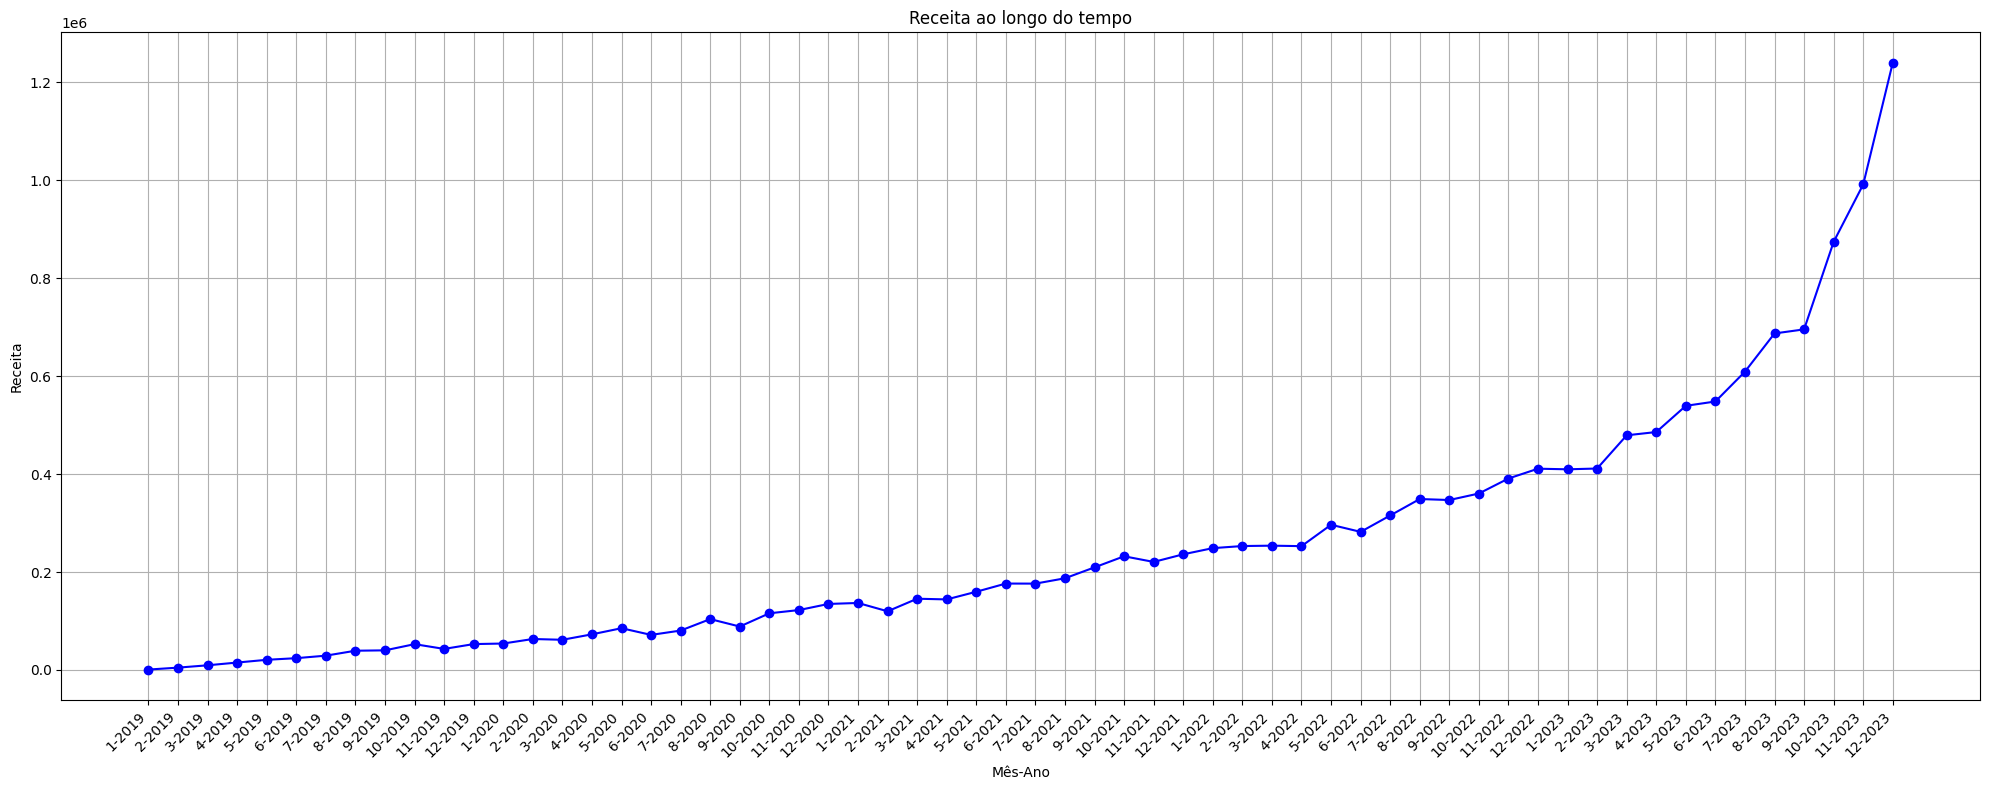

In [239]:
# Criando uma coluna 'ano_mes' concatenando ano e mês
results['ano_mes'] = results['meses'].astype(str) + '-' + results['anos'].astype(str)

# Ordenando o DataFrame por 'anos' e 'meses'
result_df = results.sort_values(by=['anos', 'meses'])

# Plotando o gráfico de linha
plt.figure(figsize=(20, 8))
plt.plot(result_df['ano_mes'], result_df['revenue'], marker='o', linestyle='-', color='b')
plt.title('Receita ao longo do tempo')
plt.xlabel('Mês-Ano')
plt.ylabel('Receita')
plt.xticks(rotation=45, ha='right')  # Rotação do rótulo para melhor legibilidade
plt.grid(True)
plt.tight_layout()
plt.show()


In [240]:
query = client.query(
    """
SELECT
  o.gender,
  ROUND(SUM(oi.sale_price * o.num_of_item), 2) AS revenue,
  SUM(o.num_of_item) AS quantity
FROM bigquery-public-data.thelook_ecommerce.order_items AS oi
INNER JOIN bigquery-public-data.thelook_ecommerce.orders AS o
ON oi.user_id = o.user_id
WHERE oi.status NOT IN ('Cancelled', 'Returned')
GROUP BY gender
ORDER BY revenue DESC;
    """)
results = query.to_dataframe()
results

,gender,revenue,quantity
0,M,14488585.96,229916
1,F,12836339.43,230295


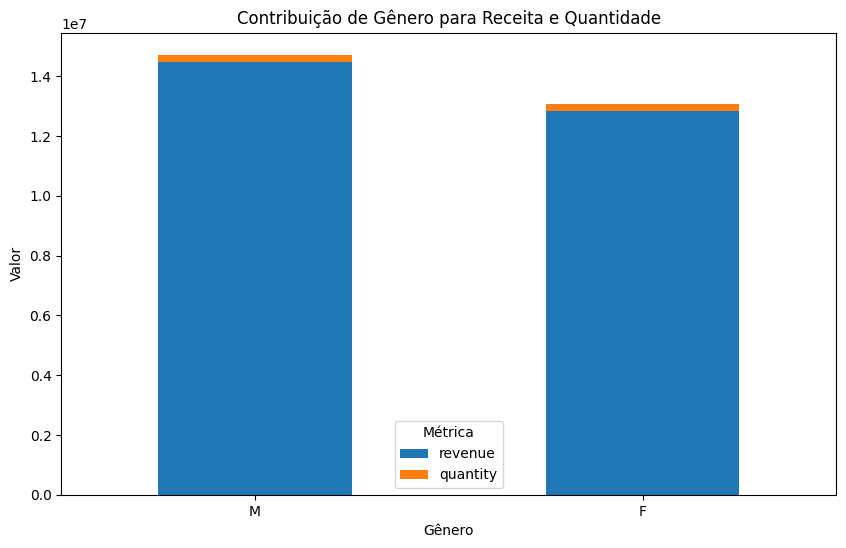

In [241]:
results.set_index('gender')[['revenue', 'quantity']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Contribuição de Gênero para Receita e Quantidade')
plt.xlabel('Gênero')
plt.ylabel('Valor')
plt.legend(title='Métrica')
plt.xticks(rotation=0)
plt.show()

In [242]:
query = client.query(
    """
SELECT
  category AS product_category,
  ROUND(SUM(sale_price * num_of_item), 2) AS revenue,
  SUM(num_of_item) AS quantity
FROM bigquery-public-data.thelook_ecommerce.order_items oi
INNER JOIN bigquery-public-data.thelook_ecommerce.orders o
ON oi.order_id = o.order_id
INNER JOIN bigquery-public-data.thelook_ecommerce.products p
ON oi.product_id = p.id
WHERE oi.status NOT IN ('cancelled', 'Returned')
GROUP BY category
ORDER BY revenue DESC;
    """)
results = query.to_dataframe()
results

,product_category,revenue,quantity
0,Outerwear & Coats,2202312.58,15436
1,Jeans,2144984.16,21918
2,Sweaters,1406800.24,18486
3,Fashion Hoodies & Sweatshirts,1103402.51,20318
4,Suits & Sport Coats,1102620.39,8617
5,Swim,1097367.40,19330
6,Sleep & Lounge,937395.07,19178
7,Shorts,860864.85,18952
8,Tops & Tees,860471.55,20270
9,Dresses,789062.18,9327


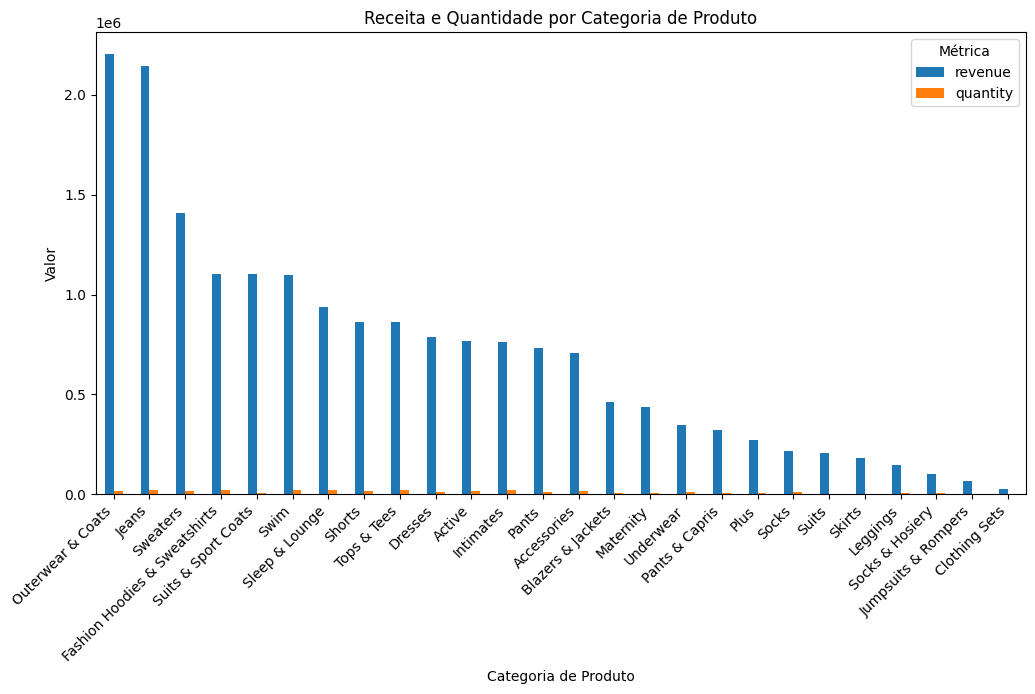

In [244]:
# Plotar gráfico de barras agrupadas
results.set_index('product_category')[['revenue', 'quantity']].plot(kind='bar', figsize=(12, 6))
plt.title('Receita e Quantidade por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Valor')
plt.legend(title='Métrica', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()